In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from keras import backend as K

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [30]:
K.set_image_data_format('channels_last')

In [29]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f0d388b14e0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f0d3878dfd0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f0d3878df60>)

In [51]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0],28, 28,1)
X_test = X_test.reshape(X_test.shape[0],28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [40]:
print(X_train_1.shape)

(60000, 28, 28, 1)


In [41]:
X_train_1[1].shape

(28, 28, 1)

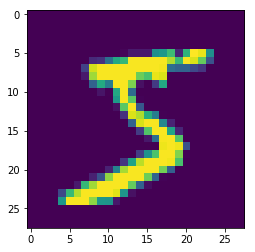

In [42]:
from matplotlib import pyplot as plt
%matplotlib inline  
plt.imshow(np.squeeze(X_train[0]))


In [43]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [44]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
print(model.output_shape)


(None, 26, 26, 32)


/home/chenjennhaur/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  from ipykernel import kernelapp as app


In [45]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/home/chenjennhaur/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [46]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [49]:
model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
 1472/60000 [..............................] - ETA: 6s - loss: 0.0159 - acc: 0.9932

/home/chenjennhaur/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


60000/60000 [==============================] - 6s - loss: 0.0166 - acc: 0.9946     
Epoch 2/10
60000/60000 [==============================] - 5s - loss: 0.0167 - acc: 0.9949     
Epoch 3/10
60000/60000 [==============================] - 5s - loss: 0.0161 - acc: 0.9947     
Epoch 4/10
60000/60000 [==============================] - 5s - loss: 0.0148 - acc: 0.9953     
Epoch 5/10
60000/60000 [==============================] - 5s - loss: 0.0153 - acc: 0.9948     
Epoch 6/10
60000/60000 [==============================] - 5s - loss: 0.0152 - acc: 0.9951     
Epoch 7/10
60000/60000 [==============================] - 5s - loss: 0.0146 - acc: 0.9953     
Epoch 8/10
60000/60000 [==============================] - 5s - loss: 0.0133 - acc: 0.9957     
Epoch 9/10
60000/60000 [==============================] - 5s - loss: 0.0140 - acc: 0.9955     
Epoch 10/10
60000/60000 [==============================] - 5s - loss: 0.0143 - acc: 0.9953     


In [53]:
score = model.evaluate(X_test, Y_test, verbose=0)
score

[0.034837121467030968, 0.99209999999999998]

## Simple Example

In [8]:
dataset = np.loadtxt("pima-indians-diabetes.data",delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [9]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
768/768 [==============================] - 0s - loss: 1.5601 - acc: 0.6016     
Epoch 2/150
768/768 [==============================] - 0s - loss: 0.7222 - acc: 0.6419     
Epoch 3/150
768/768 [==============================] - 0s - loss: 0.6867 - acc: 0.6471     
Epoch 4/150
768/768 [==============================] - 0s - loss: 0.6754 - acc: 0.6497     
Epoch 5/150
768/768 [==============================] - 0s - loss: 0.6710 - acc: 0.6523     
Epoch 6/150
768/768 [==============================] - 0s - loss: 0.6673 - acc: 0.6536     
Epoch 7/150
768/768 [==============================] - 0s - loss: 0.6629 - acc: 0.6536     
Epoch 8/150
768/768 [==============================] - 0s - loss: 0.6601 - acc: 0.6536     
Epoch 9/150
768/768 [==============================] - 0s - loss: 0.6574 - acc: 0.6536     
Epoch 10/150
768/768 [==============================] - 0s - loss: 0.6553 - acc: 0.6549     
Epoch 11/150
768/768 [==============================] - 0s - loss: 0.6536 - acc

In [12]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/768 [>.............................] - ETA: 0s
acc: 72.53%


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12507199801395106262
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 163119104
locality {
  bus_id: 1
}
incarnation: 11541265819684223858
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0"
]


In [2]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))